In [137]:
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
file= 'C:\\Users\\Sasha\\Downloads\\Fantasy.csv'

In [139]:
df=pd.read_csv(file)

In [140]:
df.head()

,Player Name,Position,PPG Actual (Avg),Projected Avg.,Differential of Actual/Porj Average,Unnamed: 5,Std. Dev of Actual vs. Proj Average,Std. Dev of actual points,Week 1 Proj,Week 1 Actual,...,Week 9 Difference,Week 10 Difference,Week 11 Difference,Week 12 Difference,Week 13 Difference,Week 14 Difference,Week 15 Difference,Week 16 Difference,Week 17 Difference,Week 18 Difference
0,Baker Mayfield,QB,14.22,12.68,1.54,NaN,4.97,4.83,14.98,16.02,...,6.96,4.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tyreek Hill,WR,24.22,19.61,4.61,NaN,10.17,9.97,17.08,44.50,...,-6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Josh Allen,QB,23.58,20.93,2.65,NaN,8.15,8.05,20.56,9.04,...,5.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jalen Hurts,QB,23.28,22.37,0.90,NaN,4.61,4.75,22.30,12.50,...,3.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AJ Brown,WR,22.61,17.00,5.61,NaN,9.00,9.12,16.89,14.90,...,3.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
print(df.columns)

Index(['Player Name', ' Position', 'PPG Actual (Avg)', 'Projected Avg.',
       'Differential of Actual/Porj Average', 'Unnamed: 5',
       'Std. Dev of Actual vs. Proj Average', 'Std. Dev of actual points',
       ' Week 1 Proj', ' Week 1 Actual', ' Week 2 Proj', ' Week 2 Actual',
       ' Week 3 Proj', ' Week 3 Actual', ' Week 4 Proj', ' Week 4 Actual',
       ' Week 5 Proj', ' Week 5 Actual', ' Week 6 Proj', ' Week 6 Actual',
       ' Week 7 Proj', ' Week 7 Actual', ' Week 8 Proj', ' Week 8 Actual',
       ' Week 9 Proj', ' Week 9 Actual', ' Week 10 Proj', ' Week 10 Actual',
       ' Week 11 Proj', ' Week 11 Actual', ' Week 12 Proj', ' Week 12 Actual',
       ' Week 13 Proj', ' Week 13 Actual', ' Week 14 Proj', ' Week 14 Actual',
       ' Week 15 Proj', ' Week 15 Actual', ' Week 16 Proj', ' Week 16 Actual',
       ' Week 17 Proj', ' Week 17 Actual', ' Week 18 Proj', ' Week 18 Actual',
       'Total Proj Points', 'Total Actual Points',
       'Total Proj vs. Actual Differential', 'We

# Data Cleaning 

### One issue with my original data, averages were calculated by taking the total points and dividing by all the weeks, but some players had bye weeks or injuries, so I need to create a new datafram that considers this, and ignores these weeks

### I'll see how many times players have a non-null value for week 1 actual, week 2 actual, etc., this would give us games played, which could be used for a new average calculation.

### Also, it looks like there are extra spaces in the column names for the weeks, so I'll  remove that

In [142]:
# Make a copy of the original DataFrame 'df'
original_df = df.copy()

In [143]:
original_df.head()

,Player Name,Position,PPG Actual (Avg),Projected Avg.,Differential of Actual/Porj Average,Unnamed: 5,Std. Dev of Actual vs. Proj Average,Std. Dev of actual points,Week 1 Proj,Week 1 Actual,...,Week 9 Difference,Week 10 Difference,Week 11 Difference,Week 12 Difference,Week 13 Difference,Week 14 Difference,Week 15 Difference,Week 16 Difference,Week 17 Difference,Week 18 Difference
0,Baker Mayfield,QB,14.22,12.68,1.54,NaN,4.97,4.83,14.98,16.02,...,6.96,4.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tyreek Hill,WR,24.22,19.61,4.61,NaN,10.17,9.97,17.08,44.50,...,-6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Josh Allen,QB,23.58,20.93,2.65,NaN,8.15,8.05,20.56,9.04,...,5.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jalen Hurts,QB,23.28,22.37,0.90,NaN,4.61,4.75,22.30,12.50,...,3.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AJ Brown,WR,22.61,17.00,5.61,NaN,9.00,9.12,16.89,14.90,...,3.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
print(original_df.columns)

Index(['Player Name', ' Position', 'PPG Actual (Avg)', 'Projected Avg.',
       'Differential of Actual/Porj Average', 'Unnamed: 5',
       'Std. Dev of Actual vs. Proj Average', 'Std. Dev of actual points',
       ' Week 1 Proj', ' Week 1 Actual', ' Week 2 Proj', ' Week 2 Actual',
       ' Week 3 Proj', ' Week 3 Actual', ' Week 4 Proj', ' Week 4 Actual',
       ' Week 5 Proj', ' Week 5 Actual', ' Week 6 Proj', ' Week 6 Actual',
       ' Week 7 Proj', ' Week 7 Actual', ' Week 8 Proj', ' Week 8 Actual',
       ' Week 9 Proj', ' Week 9 Actual', ' Week 10 Proj', ' Week 10 Actual',
       ' Week 11 Proj', ' Week 11 Actual', ' Week 12 Proj', ' Week 12 Actual',
       ' Week 13 Proj', ' Week 13 Actual', ' Week 14 Proj', ' Week 14 Actual',
       ' Week 15 Proj', ' Week 15 Actual', ' Week 16 Proj', ' Week 16 Actual',
       ' Week 17 Proj', ' Week 17 Actual', ' Week 18 Proj', ' Week 18 Actual',
       'Total Proj Points', 'Total Actual Points',
       'Total Proj vs. Actual Differential', 'We

In [145]:
# Removing the spaces at the beginning and end of column names
original_df = original_df.rename(columns=lambda x: x.strip() if 'Week' or 'Position' in x else x)
# I had to come back and add position to this statement because I didn't realize it also had a space in it.

# Create a new column for the number of games played by each player
original_df['Games Played'] = original_df[['Week 1 Actual', 'Week 2 Actual', 'Week 3 Actual', 'Week 4 Actual', 'Week 5 Actual',
                                            'Week 6 Actual', 'Week 7 Actual', 'Week 8 Actual', 'Week 9 Actual']].notnull().sum(axis=1)

# Create a new DataFrame for the adjusted average
ppg_df = original_df.copy()

# Calculate average points per game for 'PPG Actual (Avg)'
ppg_df['PPG Actual (Avg)'] = original_df['Total Actual Points'] / original_df['Games Played']

# Calculate average points per game for 'Projected Avg.'
ppg_df['Projected Avg.'] = original_df['Total Proj Points'] / original_df['Games Played']


In [146]:
ppg_df.head()

,Player Name,Position,PPG Actual (Avg),Projected Avg.,Differential of Actual/Porj Average,Unnamed: 5,Std. Dev of Actual vs. Proj Average,Std. Dev of actual points,Week 1 Proj,Week 1 Actual,...,Week 10 Difference,Week 11 Difference,Week 12 Difference,Week 13 Difference,Week 14 Difference,Week 15 Difference,Week 16 Difference,Week 17 Difference,Week 18 Difference,Games Played
0,Baker Mayfield,QB,16.000000,14.268750,1.54,NaN,4.97,4.83,14.98,16.02,...,4.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,Tyreek Hill,WR,24.222222,19.607778,4.61,NaN,10.17,9.97,17.08,44.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,Josh Allen,QB,23.580000,20.927778,2.65,NaN,8.15,8.05,20.56,9.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,Jalen Hurts,QB,23.275556,22.371111,0.90,NaN,4.61,4.75,22.30,12.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
4,AJ Brown,WR,22.611111,16.996667,5.61,NaN,9.00,9.12,16.89,14.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [147]:
# I don't like the amount of decimal places

ppg_df['PPG Actual (Avg)'] = ppg_df['PPG Actual (Avg)'].round(2)
ppg_df['Projected Avg.'] = ppg_df['Projected Avg.'].round(2)

ppg_df.head()

,Player Name,Position,PPG Actual (Avg),Projected Avg.,Differential of Actual/Porj Average,Unnamed: 5,Std. Dev of Actual vs. Proj Average,Std. Dev of actual points,Week 1 Proj,Week 1 Actual,...,Week 10 Difference,Week 11 Difference,Week 12 Difference,Week 13 Difference,Week 14 Difference,Week 15 Difference,Week 16 Difference,Week 17 Difference,Week 18 Difference,Games Played
0,Baker Mayfield,QB,16.00,14.27,1.54,NaN,4.97,4.83,14.98,16.02,...,4.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,Tyreek Hill,WR,24.22,19.61,4.61,NaN,10.17,9.97,17.08,44.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,Josh Allen,QB,23.58,20.93,2.65,NaN,8.15,8.05,20.56,9.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,Jalen Hurts,QB,23.28,22.37,0.90,NaN,4.61,4.75,22.30,12.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
4,AJ Brown,WR,22.61,17.00,5.61,NaN,9.00,9.12,16.89,14.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


### One Final Issue I noticed is the column for Actual/Projected Differential seems off, so I will re-calculate that, also, the Actual/Projected Differential Average column needs to adjust for the amount of weeks played, so I'll fix this.

In [148]:
import pandas as pd

# Assuming 'ppg_df' is your DataFrame

# Replace 'Total Proj vs. Actual Differential' with the difference between 'Total Actual Points' and 'Total Proj Points'
ppg_df['Total Proj vs. Actual Differential'] = ppg_df['Total Actual Points'] - ppg_df['Total Proj Points']

# Replace 'Differential of Actual/Proj Average' take into account the number of weeks played
ppg_df['Differential of Actual/Porj Average'] = (ppg_df['Total Actual Points'] / ppg_df['Games Played']) - (ppg_df['Total Proj Points'] / ppg_df['Games Played'])

# Column was named incorrectly
ppg_df.rename(columns={'Differential of Actual/Porj Average': 'Differential of Actual/Proj Average'}, inplace=True)

ppg_df['Total Proj vs. Actual Differential'] = ppg_df['Total Proj vs. Actual Differential'].round(2)
ppg_df['Differential of Actual/Proj Average'] = ppg_df['Differential of Actual/Proj Average'].round(2)

In [149]:
ppg_df.head()

,Player Name,Position,PPG Actual (Avg),Projected Avg.,Differential of Actual/Proj Average,Unnamed: 5,Std. Dev of Actual vs. Proj Average,Std. Dev of actual points,Week 1 Proj,Week 1 Actual,...,Week 10 Difference,Week 11 Difference,Week 12 Difference,Week 13 Difference,Week 14 Difference,Week 15 Difference,Week 16 Difference,Week 17 Difference,Week 18 Difference,Games Played
0,Baker Mayfield,QB,16.00,14.27,1.73,NaN,4.97,4.83,14.98,16.02,...,4.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,Tyreek Hill,WR,24.22,19.61,4.61,NaN,10.17,9.97,17.08,44.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,Josh Allen,QB,23.58,20.93,2.65,NaN,8.15,8.05,20.56,9.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,Jalen Hurts,QB,23.28,22.37,0.90,NaN,4.61,4.75,22.30,12.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
4,AJ Brown,WR,22.61,17.00,5.61,NaN,9.00,9.12,16.89,14.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [150]:
# Assuming 'Position' column is a categorical variable
ppg_df['Position'] = ppg_df['Position'].astype('category')

# Create separate DataFrames for TE, WR, and QB
te_df = ppg_df[ppg_df['Position'] == 'TE']
wr_df = ppg_df[ppg_df['Position'] == 'WR']
qb_df = ppg_df[ppg_df['Position'] == 'QB']
rb_df = ppg_df[ppg_df['Position'] == 'RB']

In [151]:
rb_df.head()

,Player Name,Position,PPG Actual (Avg),Projected Avg.,Differential of Actual/Proj Average,Unnamed: 5,Std. Dev of Actual vs. Proj Average,Std. Dev of actual points,Week 1 Proj,Week 1 Actual,...,Week 10 Difference,Week 11 Difference,Week 12 Difference,Week 13 Difference,Week 14 Difference,Week 15 Difference,Week 16 Difference,Week 17 Difference,Week 18 Difference,Games Played
5,CMC,RB,25.05,21.14,3.91,NaN,10.24,10.27,18.10,25.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
8,Raheem Mostert,RB,18.96,13.16,5.79,NaN,12.97,12.68,13.24,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
12,Travis Etienne,RB,20.49,14.68,5.81,NaN,8.61,8.76,13.61,21.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
22,DJ Moore,RB,16.50,12.99,3.51,NaN,13.31,13.11,13.95,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
25,Travis Etienne,RB,20.49,14.68,5.81,NaN,9.43,9.37,13.61,21.4,...,-9.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


# Analysis of Points by Position Type

### Now the data is looking better, I'd like to see a visual of the points scored by position, this could be useful in finding what position type is better to draft early, and which can be held off until later.

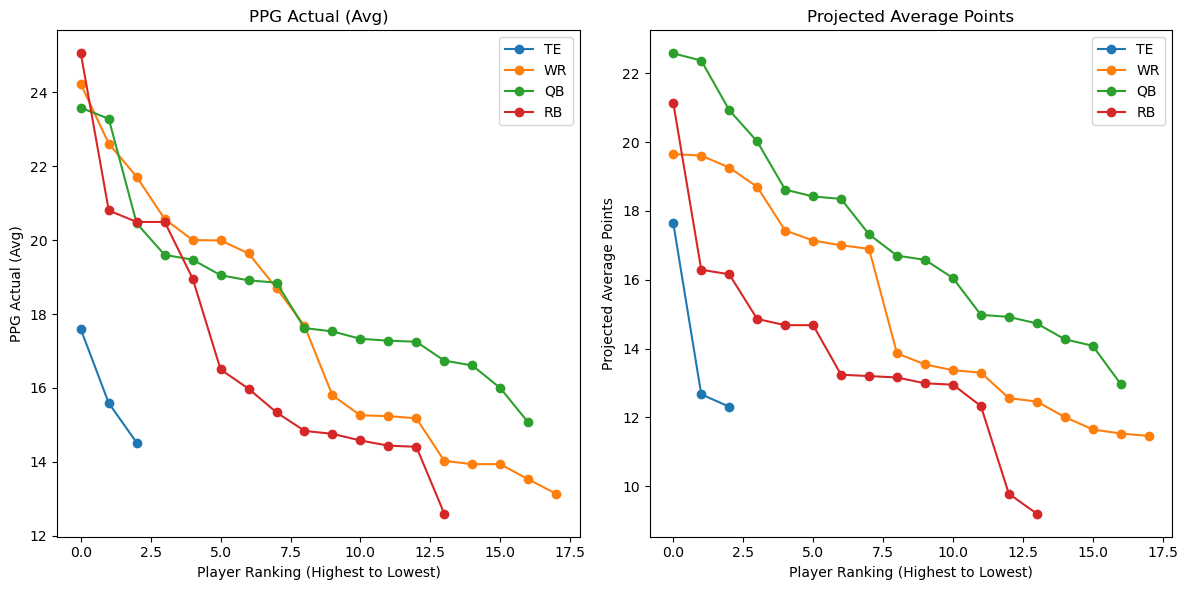

In [152]:
# Assuming 'PPG Actual (Avg)' and 'Projected Avg.' are the columns representing the average points
# Adjust the column names based on your actual data
te_actual_ppg = te_df['PPG Actual (Avg)'].sort_values(ascending=False).reset_index(drop=True)
wr_actual_ppg = wr_df['PPG Actual (Avg)'].sort_values(ascending=False).reset_index(drop=True)
qb_actual_ppg = qb_df['PPG Actual (Avg)'].sort_values(ascending=False).reset_index(drop=True)
rb_actual_ppg = rb_df['PPG Actual (Avg)'].sort_values(ascending=False).reset_index(drop=True)

te_proj_ppg = te_df['Projected Avg.'].sort_values(ascending=False).reset_index(drop=True)
wr_proj_ppg = wr_df['Projected Avg.'].sort_values(ascending=False).reset_index(drop=True)
qb_proj_ppg = qb_df['Projected Avg.'].sort_values(ascending=False).reset_index(drop=True)
rb_proj_ppg = rb_df['Projected Avg.'].sort_values(ascending=False).reset_index(drop=True)

# Plotting PPG actual
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(te_actual_ppg, label='TE', marker='o')
plt.plot(wr_actual_ppg, label='WR', marker='o')
plt.plot(qb_actual_ppg, label='QB', marker='o')
plt.plot(rb_actual_ppg, label='RB', marker='o')
plt.title('PPG Actual (Avg)')
plt.xlabel('Player Ranking (Highest to Lowest)')
plt.ylabel('PPG Actual (Avg)')
plt.legend()

# Plotting total projections
plt.subplot(1, 2, 2)
plt.plot(te_proj_ppg, label='TE', marker='o')
plt.plot(wr_proj_ppg, label='WR', marker='o')
plt.plot(qb_proj_ppg, label='QB', marker='o')
plt.plot(rb_proj_ppg, label='RB', marker='o')
plt.title('Projected Average Points')
plt.xlabel('Player Ranking (Highest to Lowest)')
plt.ylabel('Projected Average Points')
plt.legend()

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()


### Let's check out how each position type does relative to their projections

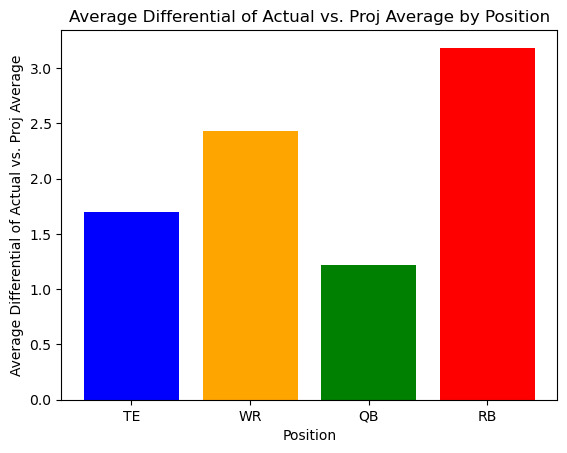

In [153]:
import matplotlib.pyplot as plt

# Assuming 'Differential of Actual/Proj Average' is the column representing the difference
# Adjust the column name based on your actual data
te_diff_avg = te_df['Differential of Actual/Proj Average'].mean()
wr_diff_avg = wr_df['Differential of Actual/Proj Average'].mean()
qb_diff_avg = qb_df['Differential of Actual/Proj Average'].mean()
rb_diff_avg = rb_df['Differential of Actual/Proj Average'].mean()

# Create a bar graph
positions = ['TE', 'WR', 'QB', 'RB']
differentials = [te_diff_avg, wr_diff_avg, qb_diff_avg, rb_diff_avg]

fig, ax = plt.subplots()
ax.bar(positions, differentials, color=['blue', 'orange', 'green', 'red'])
ax.set_title('Average Differential of Actual vs. Proj Average by Position')
ax.set_xlabel('Position')
ax.set_ylabel('Average Differential of Actual vs. Proj Average')
plt.show()


### So with the current data, running backs outscore their projections the most, while QBs are closest to their projections on average, however that doesn't necessarily depict how volitile a position is. 

### For example a player could score 20 points higher than their projected, then 20 points lower the next week, but their average would be the same as someone who scored exactly what they were projected for 2 weeks straight. 

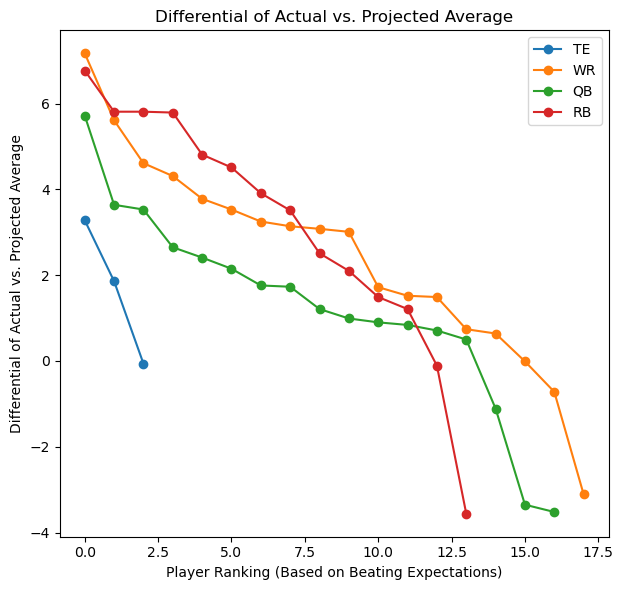

TE Results:
     Player Name  Differential of Actual/Proj Average
27  TJ Hockenson                                 1.86
38  Travis Kelce                                -0.06
43  Mark Andrews                                 3.28

WR Results:
          Player Name  Differential of Actual/Proj Average
1         Tyreek Hill                                 4.61
4            AJ Brown                                 5.61
6        Stefon Diggs                                 3.01
11       Keenan Allen                                 3.14
14         Puka Nacua                                 4.31
15        CeeDee Lamb                                 0.74
17      Ja'marr Chase                                -0.01
20       Adam Thielen                                 7.17
24  Amon-Ra St. Brown                                 3.08
29    Michael Pittman                                 1.72
30         Mike Evans                                 3.25
32     Jordan Addison                              

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Differential of Actual/Porj Average' is the column representing the differential
# Adjust the column names based on your actual data
te_diff = te_df['Differential of Actual/Proj Average'].sort_values(ascending=False).reset_index(drop=True)
wr_diff = wr_df['Differential of Actual/Proj Average'].sort_values(ascending=False).reset_index(drop=True)
qb_diff = qb_df['Differential of Actual/Proj Average'].sort_values(ascending=False).reset_index(drop=True)
rb_diff = rb_df['Differential of Actual/Proj Average'].sort_values(ascending=False).reset_index(drop=True)

# Plotting differential of actual vs. projected average
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(te_diff, label='TE', marker='o')
plt.plot(wr_diff, label='WR', marker='o')
plt.plot(qb_diff, label='QB', marker='o')
plt.plot(rb_diff, label='RB', marker='o')
plt.title('Differential of Actual vs. Projected Average')
plt.xlabel('Player Ranking (Based on Beating Expectations)')
plt.ylabel('Differential of Actual vs. Projected Average')
plt.legend()

# Adjust layout for better visibility
plt.tight_layout()

# Show the plot
plt.show()

# Printing the results
print("TE Results:")
print(te_df[['Player Name', 'Differential of Actual/Proj Average']])

print("\nWR Results:")
print(wr_df[['Player Name', 'Differential of Actual/Proj Average']])

print("\nQB Results:")
print(qb_df[['Player Name', 'Differential of Actual/Proj Average']])

print("\nRB Results:")
print(rb_df[['Player Name', 'Differential of Actual/Proj Average']])


### This goes a little more in depth for performance vs. expectations, 2 quarterbacks who did poorly here are Joe Burrow an Patrick Mahomes, this may be misleading to some who may think they are worse quarterbacks than others in the list, but they still scored a lot of points, they just had very high projections.

In [155]:
correlation = df['PPG Actual (Avg)'].corr(df['Projected Avg.'])

# Print the correlation coefficient
print(f"Correlation between Total Actual Points and Total Proj Points: {correlation}")


Correlation between Total Actual Points and Total Proj Points: 0.7172809998466511


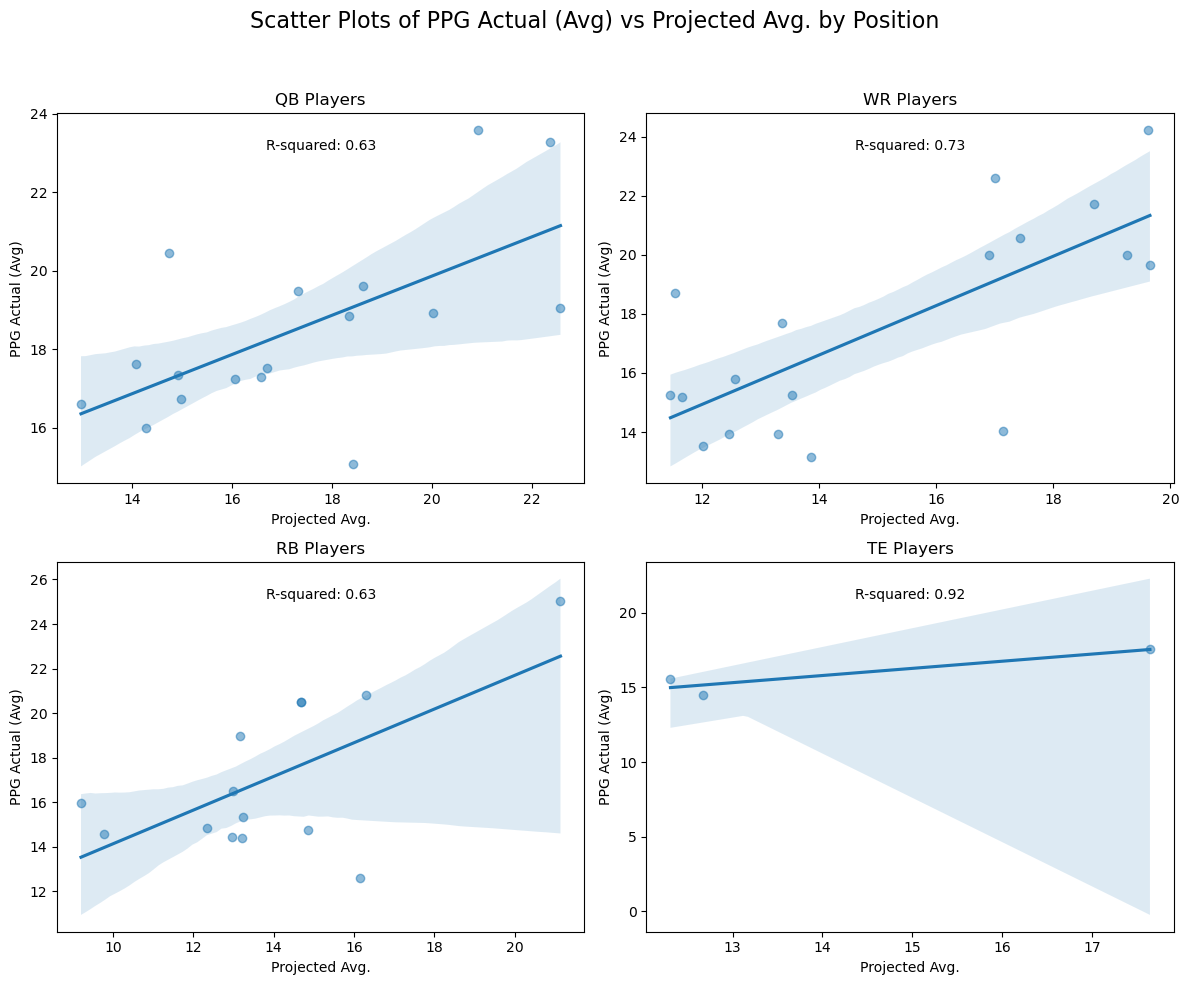

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Assuming your DataFrame is named df
# Adjust column names as needed

# List of positions
positions = ppg_df['Position'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots of PPG Actual (Avg) vs Projected Avg. by Position', fontsize=16)

for i, position in enumerate(positions):
    # Filter data for the specific position
    position_data = ppg_df[ppg_df['Position'] == position]

    # Create scatter plot with a regression line
    sns.regplot(x='Projected Avg.', y='PPG Actual (Avg)', data=position_data, ax=axes[i//2, i%2], scatter_kws={'alpha':0.5})
    axes[i//2, i%2].set_title(f'{position} Players')
    axes[i//2, i%2].set_xlabel('Projected Avg.')
    axes[i//2, i%2].set_ylabel('PPG Actual (Avg)')

    # Calculate and display correlation coefficient (R-squared)
    corr_coefficient, _ = pearsonr(position_data['Projected Avg.'], position_data['PPG Actual (Avg)'])
    axes[i//2, i%2].text(0.5, 0.9, f'R-squared: {corr_coefficient:.2f}', transform=axes[i//2, i%2].transAxes, ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Based on the R-squared values, we can see which positions type has the most accurate projections. At the time of making this, I don't have many players for tight ends, this may be updated later.

# Player Volatility

### Here I can use standard deviation to see which player (or player types) are more volatile/stable, this should show which players are more safe, and which are higher risk/high reward.

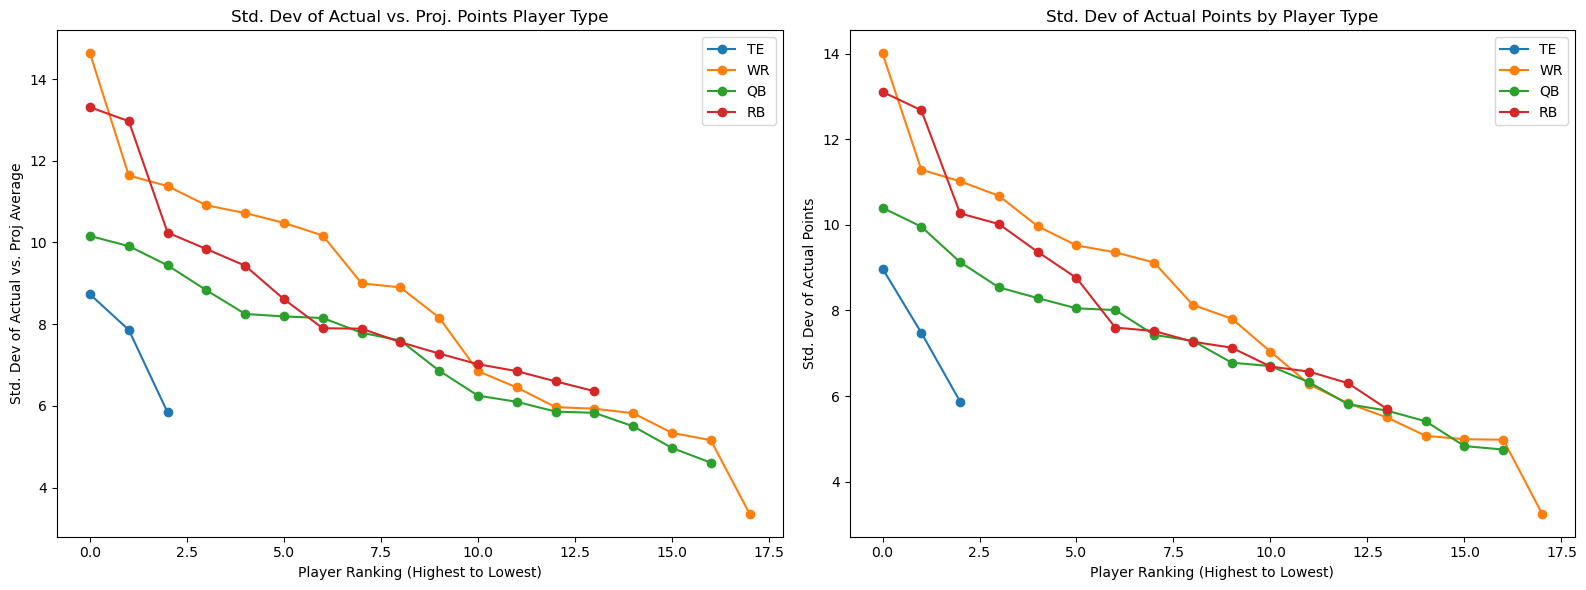

In [162]:
import matplotlib.pyplot as plt

# Assuming 'Std. Dev of actual points' is the column representing the standard deviation of actual points
te_std_actual_points_vs_proj = te_df['Std. Dev of Actual vs. Proj Average'].sort_values(ascending=False).reset_index(drop=True)
wr_std_actual_points_vs_proj = wr_df['Std. Dev of Actual vs. Proj Average'].sort_values(ascending=False).reset_index(drop=True)
qb_std_actual_points_vs_proj = qb_df['Std. Dev of Actual vs. Proj Average'].sort_values(ascending=False).reset_index(drop=True)
rb_std_actual_points_vs_proj = rb_df['Std. Dev of Actual vs. Proj Average'].sort_values(ascending=False).reset_index(drop=True)

te_std_actual_points = te_df['Std. Dev of actual points'].sort_values(ascending=False).reset_index(drop=True)
wr_std_actual_points = wr_df['Std. Dev of actual points'].sort_values(ascending=False).reset_index(drop=True)
qb_std_actual_points = qb_df['Std. Dev of actual points'].sort_values(ascending=False).reset_index(drop=True)
rb_std_actual_points = rb_df['Std. Dev of actual points'].sort_values(ascending=False).reset_index(drop=True)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the line graph for Std. Dev of Actual vs. Proj Average
axs[0].plot(te_std_actual_points_vs_proj, label='TE', marker='o')
axs[0].plot(wr_std_actual_points_vs_proj, label='WR', marker='o')
axs[0].plot(qb_std_actual_points_vs_proj, label='QB', marker='o')
axs[0].plot(rb_std_actual_points_vs_proj, label='RB', marker='o')

# Set labels and title for the first subplot
axs[0].set_xlabel('Player Ranking (Highest to Lowest)')
axs[0].set_ylabel('Std. Dev of Actual vs. Proj Average')
axs[0].set_title('Std. Dev of Actual vs. Proj. Points Player Type')
axs[0].legend()

# Plotting the line graph for Std. Dev of Actual Points
axs[1].plot(te_std_actual_points, label='TE', marker='o')
axs[1].plot(wr_std_actual_points, label='WR', marker='o')
axs[1].plot(qb_std_actual_points, label='QB', marker='o')
axs[1].plot(rb_std_actual_points, label='RB', marker='o')

# Set labels and title for the second subplot
axs[1].set_xlabel('Player Ranking (Highest to Lowest)')
axs[1].set_ylabel('Std. Dev of Actual Points')
axs[1].set_title('Std. Dev of Actual Points by Player Type')
axs[1].legend()

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()


In [158]:
# Print players with highest and lowest standard deviations of actual points
te_max_std_player = te_df.loc[te_df['Std. Dev of actual points'].idxmax()]
te_min_std_player = te_df.loc[te_df['Std. Dev of actual points'].idxmin()]

wr_max_std_player = wr_df.loc[wr_df['Std. Dev of actual points'].idxmax()]
wr_min_std_player = wr_df.loc[wr_df['Std. Dev of actual points'].idxmin()]

qb_max_std_player = qb_df.loc[qb_df['Std. Dev of actual points'].idxmax()]
qb_min_std_player = qb_df.loc[qb_df['Std. Dev of actual points'].idxmin()]

rb_max_std_player = rb_df.loc[rb_df['Std. Dev of actual points'].idxmax()]
rb_min_std_player = rb_df.loc[rb_df['Std. Dev of actual points'].idxmin()]

print("Players with Highest Std. Dev:")
print("TE:", te_max_std_player['Player Name'], te_max_std_player['Std. Dev of actual points'])
print("WR:", wr_max_std_player['Player Name'], wr_max_std_player['Std. Dev of actual points'])
print("QB:", qb_max_std_player['Player Name'], qb_max_std_player['Std. Dev of actual points'])
print("RB:", rb_max_std_player['Player Name'], rb_max_std_player['Std. Dev of actual points'])

print("\nPlayers with Lowest Std. Dev:")
print("TE:", te_min_std_player['Player Name'], te_min_std_player['Std. Dev of actual points'])
print("WR:", wr_min_std_player['Player Name'], wr_min_std_player['Std. Dev of actual points'])
print("QB:", qb_min_std_player['Player Name'], qb_min_std_player['Std. Dev of actual points'])
print("RB:", rb_min_std_player['Player Name'], rb_min_std_player['Std. Dev of actual points'])

# Calculate and print average standard deviation by position type
te_avg_std = te_df['Std. Dev of actual points'].mean()
wr_avg_std = wr_df['Std. Dev of actual points'].mean()
qb_avg_std = qb_df['Std. Dev of actual points'].mean()
rb_avg_std = rb_df['Std. Dev of actual points'].mean()

print("\nAverage Std. Dev by Position Type:")
print("TE:", te_avg_std)
print("WR:", wr_avg_std)
print("QB:", qb_avg_std)
print("RB:", rb_avg_std)


Players with Highest Std. Dev:
TE: Travis Kelce 8.98
WR: Ja'marr Chase 14.01
QB: Dak Prescott 10.4
RB: DJ Moore 13.11

Players with Lowest Std. Dev:
TE: Mark Andrews 5.87
WR: Garret Wilson 3.25
QB: Jalen Hurts 4.75
RB: Alvin Kamara 5.7

Average Std. Dev by Position Type:
TE: 7.443333333333334
WR: 7.99111111111111
QB: 7.256470588235295
RB: 8.499285714285712


### So above are the players with the highest and lowest standard deviations of actual points for each position type, and then by position type, so Ja'maar Chase, and Travis Kelce are two players who deviate from their mean score a lot. 

### Below I'll do something similar, but seeing the standard deviation of the difference between actual and projected points

In [166]:
# Print players with highest and lowest standard deviations of Actual vs. Proj Average
te_max_differential_std_player = te_df.loc[te_df['Std. Dev of Actual vs. Proj Average'].idxmax()]
te_min_differential_std_player = te_df.loc[te_df['Std. Dev of Actual vs. Proj Average'].idxmin()]

wr_max_differential_std_player = wr_df.loc[wr_df['Std. Dev of Actual vs. Proj Average'].idxmax()]
wr_min_differential_std_player = wr_df.loc[wr_df['Std. Dev of Actual vs. Proj Average'].idxmin()]

qb_max_differential_std_player = qb_df.loc[qb_df['Std. Dev of Actual vs. Proj Average'].idxmax()]
qb_min_differential_std_player = qb_df.loc[qb_df['Std. Dev of Actual vs. Proj Average'].idxmin()]

rb_max_differential_std_player = rb_df.loc[rb_df['Std. Dev of Actual vs. Proj Average'].idxmax()]
rb_min_differential_std_player = rb_df.loc[rb_df['Std. Dev of Actual vs. Proj Average'].idxmin()]

print("Players with Highest Std. Dev of Actual vs. Proj Average:")
print("TE:", te_max_differential_std_player['Player Name'], te_max_differential_std_player['Std. Dev of Actual vs. Proj Average'])
print("WR:", wr_max_differential_std_player['Player Name'], wr_max_differential_std_player['Std. Dev of Actual vs. Proj Average'])
print("QB:", qb_max_differential_std_player['Player Name'], qb_max_differential_std_player['Std. Dev of Actual vs. Proj Average'])
print("RB:", rb_max_differential_std_player['Player Name'], rb_max_differential_std_player['Std. Dev of Actual vs. Proj Average'])

print("\nPlayers with Lowest Std. Dev of Actual vs. Proj Average:")
print("TE:", te_min_differential_std_player['Player Name'], te_min_differential_std_player['Std. Dev of Actual vs. Proj Average'])
print("WR:", wr_min_differential_std_player['Player Name'], wr_min_differential_std_player['Std. Dev of Actual vs. Proj Average'])
print("QB:", qb_min_differential_std_player['Player Name'], qb_min_differential_std_player['Std. Dev of Actual vs. Proj Average'])
print("RB:", rb_min_differential_std_player['Player Name'], rb_min_differential_std_player['Std. Dev of Actual vs. Proj Average'])

# Calculate and print average standard deviation by position type
te_avg_differential_std = te_df['Std. Dev of Actual vs. Proj Average'].mean()
wr_avg_differential_std = wr_df['Std. Dev of Actual vs. Proj Average'].mean()
qb_avg_differential_std = qb_df['Std. Dev of Actual vs. Proj Average'].mean()
rb_avg_differential_std = rb_df['Std. Dev of Actual vs. Proj Average'].mean()

print("\nAverage Std. Dev of Actual vs. Proj Average by Position Type:")
print("TE:", te_avg_differential_std)
print("WR:", wr_avg_differential_std)
print("QB:", qb_avg_differential_std)
print("RB:", rb_avg_differential_std)


Players with Highest Std. Dev of Actual vs. Proj Average:
TE: Travis Kelce 8.73
WR: Ja'marr Chase 14.63
QB: CJ Stroud 10.16
RB: DJ Moore 13.31

Players with Lowest Std. Dev of Actual vs. Proj Average:
TE: Mark Andrews 5.84
WR: Garret Wilson 3.36
QB: Jalen Hurts 4.61
RB: Alvin Kamara 6.36

Average Std. Dev of Actual vs. Proj Average by Position Type:
TE: 7.476666666666667
WR: 8.381666666666668
QB: 7.311764705882352
RB: 8.704285714285714


### The results are similar, players like Ja'maar chase have had large breakout games where they score significantly higher than projected. The same trend is here as well for running backs being harder to predict while QBs are less volitile.

# Significance in player volitility?

### One thing I'd like to see is if having a greater standard deviaton in points, or deviating a lot from projected scores, is generally correlated with doing better or worse on average.

### The code below shows an overall graph of the average PPG for players, compared to their standard deviations, the top graph is for all players, while the smaller graphs below is broken down by player type.

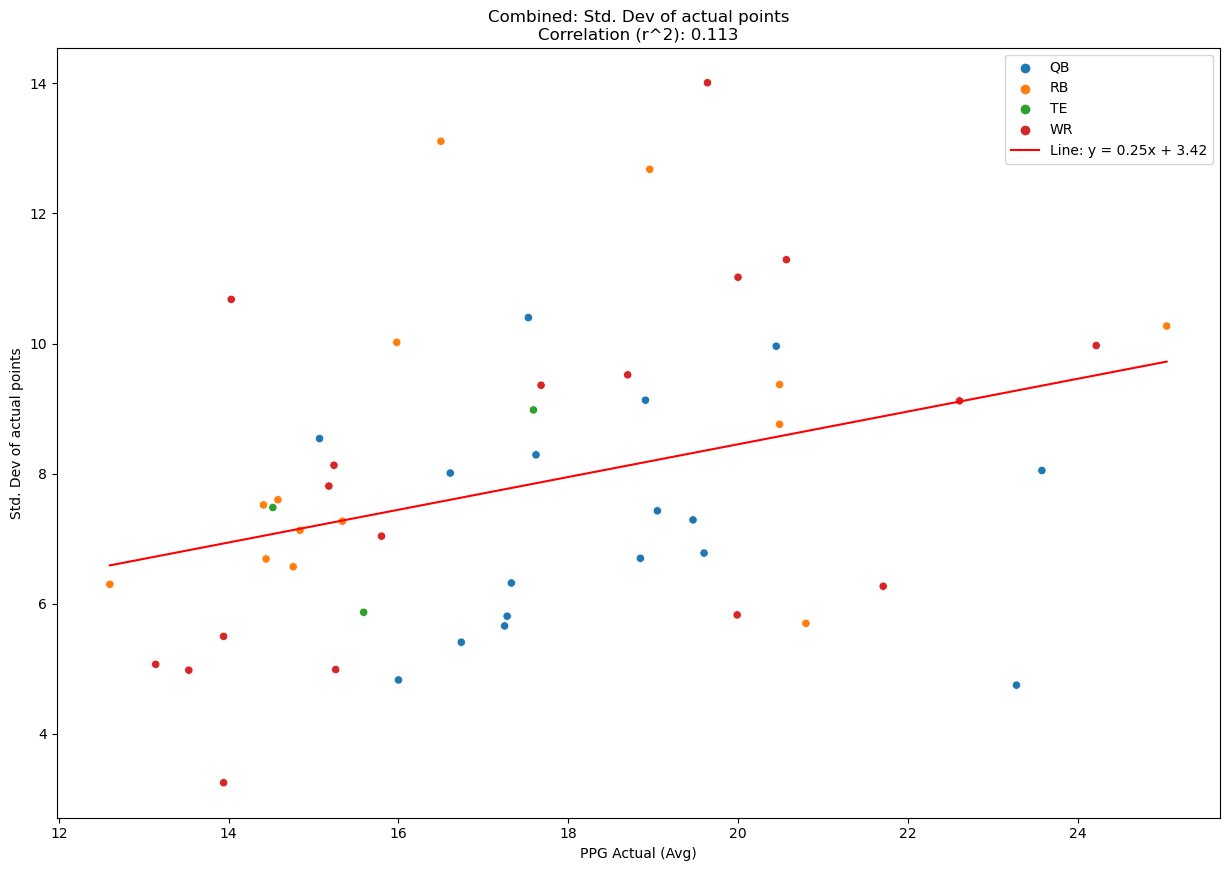

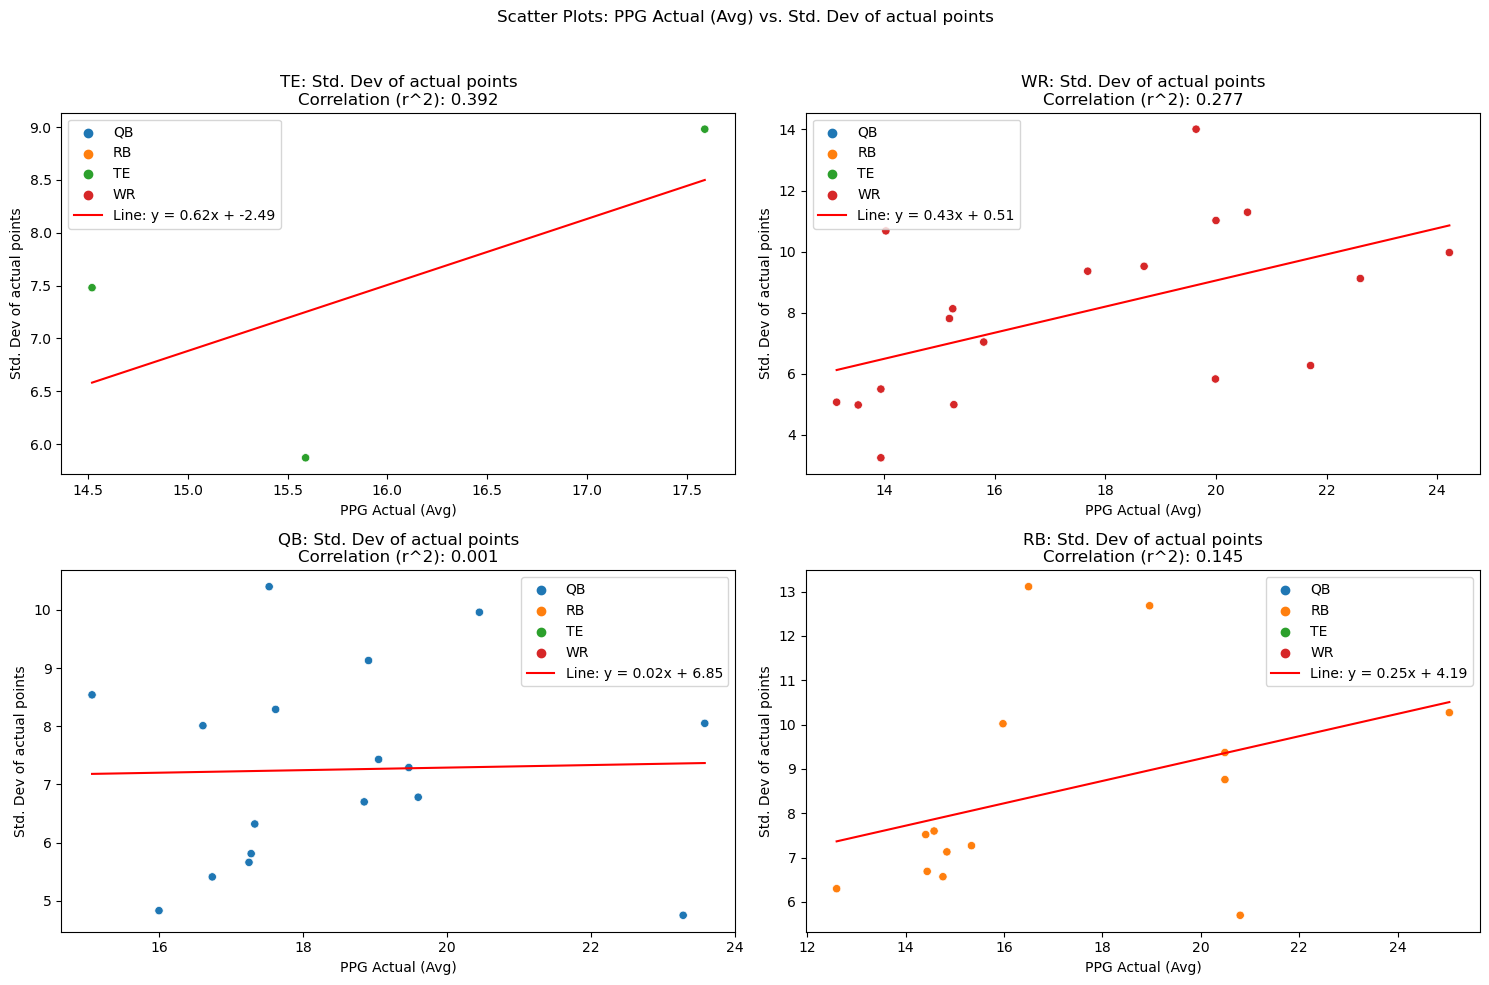

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Function to plot scatter plot with line and correlation coefficient
def plot_scatter_with_line(df, position, ax):
    sns.scatterplot(data=df, x='PPG Actual (Avg)', y='Std. Dev of actual points', hue='Position', marker='o', ax=ax)
    
    # Fit a linear regression model
    model = LinearRegression()
    X = df['PPG Actual (Avg)'].values.reshape(-1, 1)
    y = df['Std. Dev of actual points'].values
    model.fit(X, y)
    
    # Plot the regression line
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    ax.plot(x_range, y_pred, color='red', label=f'Line: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')
    
    # Calculate and display correlation coefficient (r)
    r_squared = r2_score(y, model.predict(X))
    ax.set_title(f'{position}: Std. Dev of actual points\nCorrelation (r^2): {r_squared:.3f}')
    ax.legend()

# Scatter plot with line for Std. Dev of Differential vs. PPG Actual (Avg)
plt.figure(figsize=(15, 10))
plot_scatter_with_line(combined_df, 'Combined', plt.gca())

# Scatter plot with line for Std. Dev of Differential vs. PPG Actual (Avg) for each player type
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Scatter Plots: PPG Actual (Avg) vs. Std. Dev of actual points')

positions = ['TE', 'WR', 'QB', 'RB']
for position, ax in zip(positions, axes.flatten()):
    plot_scatter_with_line(combined_df[combined_df['Position'] == position], position, ax)

# Adjust layout for better visibility
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()


### From those graphs, the first thing I realize is I need more data, but also even though there is a slight positive relationship between standard deviation and average points, the correlation is not strong at all.

### The only position type you can somewhat notice a correlation with, is wide receivers, this kind of makes sense since a lot of the top wide recievers have really big breakout games which would drive up their average as well.

## Now I'll check for a similar correlation, but looking at the players' deviation to their projections, rather than their just their scores.

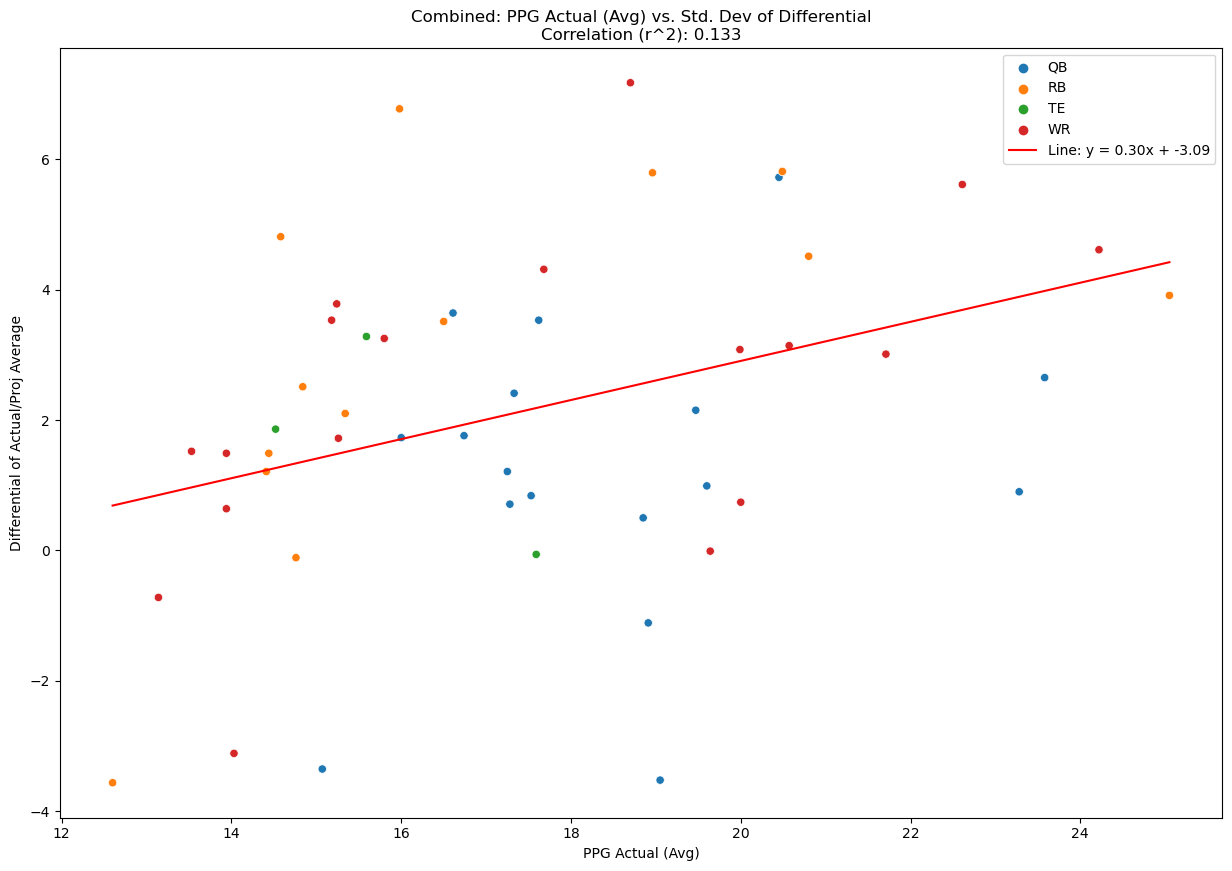

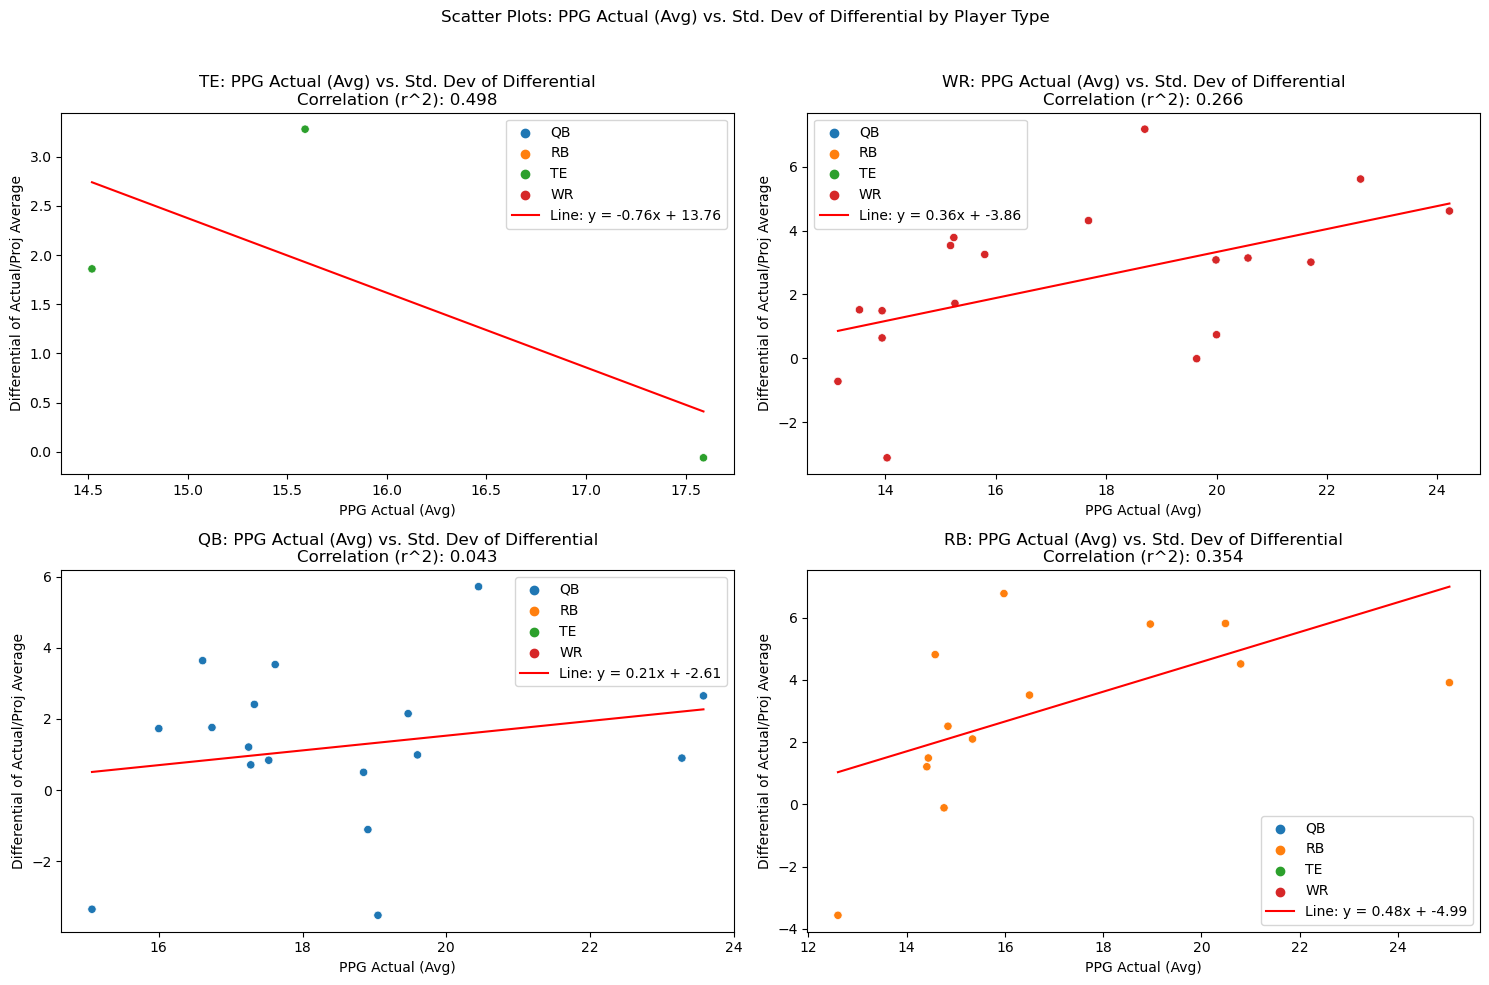

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Function to plot scatter plot with line and correlation coefficient
def plot_scatter_with_line(df, position, ax):
    sns.scatterplot(data=df, x='PPG Actual (Avg)', y='Differential of Actual/Proj Average', hue='Position', marker='o', ax=ax)
    
    # Fit a linear regression model
    model = LinearRegression()
    X = df['PPG Actual (Avg)'].values.reshape(-1, 1)
    y = df['Differential of Actual/Proj Average'].values
    model.fit(X, y)
    
    # Plot the regression line
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    ax.plot(x_range, y_pred, color='red', label=f'Line: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')
    
    # Calculate and display correlation coefficient (r)
    r_squared = r2_score(y, model.predict(X))
    ax.set_title(f'{position}: PPG Actual (Avg) vs. Std. Dev of Differential\nCorrelation (r^2): {r_squared:.3f}')
    ax.legend()

# Scatter plot with line for Std. Dev of Differential vs. PPG Actual (Avg)
plt.figure(figsize=(15, 10))
plot_scatter_with_line(combined_df, 'Combined', plt.gca())

# Scatter plot with line for Std. Dev of Differential vs. PPG Actual (Avg) for each player type
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Scatter Plots: PPG Actual (Avg) vs. Std. Dev of Differential by Player Type')

positions = ['TE', 'WR', 'QB', 'RB']
for position, ax in zip(positions, axes.flatten()):
    plot_scatter_with_line(combined_df[combined_df['Position'] == position], position, ax)

# Adjust layout for better visibility
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()


### Again I'd say more data is needed, but there do not seem to be any significant results since the correlation is low all around.